In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("E:\Data_analysis\covid\owid-covid-data.csv")

In [3]:
df.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
print(df.dtypes.to_string())

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304585 entries, 0 to 304584
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    304585 non-null  object 
 1   continent                                   290085 non-null  object 
 2   location                                    304585 non-null  object 
 3   date                                        304585 non-null  object 
 4   total_cases                                 268489 non-null  float64
 5   new_cases                                   295743 non-null  float64
 6   new_cases_smoothed                          294479 non-null  float64
 7   total_deaths                                247931 non-null  float64
 8   new_deaths                                  295839 non-null  float64
 9   new_deaths_smoothed                         294609 non-null  float64
 

In [6]:
df.count()

iso_code                                   304585
continent                                  290085
location                                   304585
date                                       304585
total_cases                                268489
                                            ...  
population                                 304585
excess_mortality_cumulative_absolute        10669
excess_mortality_cumulative                 10669
excess_mortality                            10669
excess_mortality_cumulative_per_million     10669
Length: 67, dtype: int64

In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.684890e+05,2.957430e+05,2.944790e+05,2.479310e+05,295839.000000,294609.000000,268489.000000,295743.000000,294479.000000,247931.000000,...,174626.000000,115534.000000,208319.000000,280072.000000,228746.000000,3.045850e+05,1.066900e+04,10669.000000,10669.000000,10669.000000
mean,5.576081e+06,1.094674e+04,1.099127e+04,7.952890e+04,97.627476,98.018766,85145.420991,164.986181,165.646951,798.463973,...,32.912573,50.794928,3.098352,73.722238,0.722576,1.284199e+08,4.739668e+04,9.538903,12.633550,1477.149682
std,3.493830e+07,1.041787e+05,1.013988e+05,4.115333e+05,607.167291,597.863069,135418.021397,1137.932219,640.963593,1043.865749,...,13.571348,31.955344,2.549145,7.396914,0.149001,6.606690e+08,1.384241e+05,12.914011,26.344219,1840.907839
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-1984.281600
25%,6.329000e+03,0.000000e+00,1.143000e+00,1.190000e+02,0.000000,0.000000,1931.610000,0.000000,0.281000,47.988000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,2.780000e+01,0.560000,-1.200000,24.645111
50%,6.055700e+04,1.800000e+01,3.957100e+01,1.202000e+03,0.000000,0.286000,19547.705000,2.677000,11.251000,329.361000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,4.530999e+03,7.750000,6.490000,900.418500
75%,6.208530e+05,5.470000e+02,6.492860e+02,1.041800e+04,6.000000,6.857000,103859.873000,71.934500,107.333000,1224.039500,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.159700e+04,15.360000,18.070000,2399.257000
max,7.637394e+08,7.460688e+06,6.410718e+06,6.908541e+06,20010.000000,14675.571000,733146.058000,228872.025000,37241.781000,6460.900000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.282260e+06,76.550000,377.300000,10291.122000


In [8]:
print(df.isnull().sum().to_string())

iso_code                                           0
continent                                      14500
location                                           0
date                                               0
total_cases                                    36096
new_cases                                       8842
new_cases_smoothed                             10106
total_deaths                                   56654
new_deaths                                      8746
new_deaths_smoothed                             9976
total_cases_per_million                        36096
new_cases_per_million                           8842
new_cases_smoothed_per_million                 10106
total_deaths_per_million                       56654
new_deaths_per_million                          8746
new_deaths_smoothed_per_million                 9976
reproduction_rate                             119768
icu_patients                                  269574
icu_patients_per_million                      

In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
df2 = df[['continent','location','date','total_cases','new_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests','new_tests','total_vaccinations','people_fully_vaccinated','population','hospital_beds_per_thousand','median_age','aged_65_older','aged_70_older','life_expectancy']].copy()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304585 entries, 0 to 304584
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   290085 non-null  object 
 1   location                    304585 non-null  object 
 2   date                        304585 non-null  object 
 3   total_cases                 268489 non-null  float64
 4   new_cases                   295743 non-null  float64
 5   total_deaths                247931 non-null  float64
 6   new_deaths                  295839 non-null  float64
 7   total_cases_per_million     268489 non-null  float64
 8   new_cases_per_million       295743 non-null  float64
 9   total_deaths_per_million    247931 non-null  float64
 10  new_deaths_per_million      295839 non-null  float64
 11  total_tests                 79387 non-null   float64
 12  new_tests                   75403 non-null   float64
 13  total_vaccinat

In [12]:
df2.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_vaccinations,people_fully_vaccinated,population,hospital_beds_per_thousand,median_age,aged_65_older,aged_70_older,life_expectancy
count,2.684890e+05,2.957430e+05,2.479310e+05,295839.000000,268489.000000,295743.000000,247931.000000,295839.000000,7.938700e+04,7.540300e+04,7.410500e+04,6.870900e+04,3.045850e+05,208319.000000,240373.000000,231958.000000,237961.000000,280072.000000
mean,5.576081e+06,1.094674e+04,7.952890e+04,97.627476,85145.420991,164.986181,798.463973,1.036021,2.110457e+07,6.728541e+04,3.683930e+08,1.458993e+08,1.284199e+08,3.098352,30.518067,8.705186,5.502635,73.722238
std,3.493830e+07,1.041787e+05,4.115333e+05,607.167291,135418.021397,1137.932219,1043.865749,4.726460,8.409869e+07,2.477340e+05,1.400913e+09,5.653901e+08,6.606690e+08,2.549145,9.084941,6.095300,4.136564,7.396914
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.700000e+01,0.100000,15.100000,1.144000,0.526000,53.280000
25%,6.329000e+03,0.000000e+00,1.190000e+02,0.000000,1931.610000,0.000000,47.988000,0.000000,3.646540e+05,2.244000e+03,1.446090e+06,7.315220e+05,4.490020e+05,1.300000,22.200000,3.526000,2.085000,69.590000
50%,6.055700e+04,1.800000e+01,1.202000e+03,0.000000,19547.705000,2.677000,329.361000,0.000000,2.067330e+06,8.783000e+03,1.097344e+07,4.740226e+06,5.882259e+06,2.500000,29.700000,6.378000,3.871000,75.050000
75%,6.208530e+05,5.470000e+02,1.041800e+04,6.000000,103859.873000,71.934500,1224.039500,0.450000,1.024845e+07,3.722900e+04,8.016569e+07,3.175825e+07,2.830170e+07,4.200000,38.700000,13.928000,8.643000,79.460000
max,7.637394e+08,7.460688e+06,6.908541e+06,20010.000000,733146.058000,228872.025000,6460.900000,603.656000,9.214000e+09,3.585563e+07,1.337369e+10,5.129429e+09,7.975105e+09,13.800000,48.200000,27.049000,18.493000,86.750000


In [13]:
df2.isnull().sum()

continent                      14500
location                           0
date                               0
total_cases                    36096
new_cases                       8842
total_deaths                   56654
new_deaths                      8746
total_cases_per_million        36096
new_cases_per_million           8842
total_deaths_per_million       56654
new_deaths_per_million          8746
total_tests                   225198
new_tests                     229182
total_vaccinations            230480
people_fully_vaccinated       235876
population                         0
hospital_beds_per_thousand     96266
median_age                     64212
aged_65_older                  72627
aged_70_older                  66624
life_expectancy                24513
dtype: int64

In [14]:
df2.dropna(inplace=True)

In [15]:
df2.isnull().sum()

continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
total_tests                   0
new_tests                     0
total_vaccinations            0
people_fully_vaccinated       0
population                    0
hospital_beds_per_thousand    0
median_age                    0
aged_65_older                 0
aged_70_older                 0
life_expectancy               0
dtype: int64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23144 entries, 2807 to 304249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   23144 non-null  object 
 1   location                    23144 non-null  object 
 2   date                        23144 non-null  object 
 3   total_cases                 23144 non-null  float64
 4   new_cases                   23144 non-null  float64
 5   total_deaths                23144 non-null  float64
 6   new_deaths                  23144 non-null  float64
 7   total_cases_per_million     23144 non-null  float64
 8   new_cases_per_million       23144 non-null  float64
 9   total_deaths_per_million    23144 non-null  float64
 10  new_deaths_per_million      23144 non-null  float64
 11  total_tests                 23144 non-null  float64
 12  new_tests                   23144 non-null  float64
 13  total_vaccinations         

In [17]:
df2.drop_duplicates(inplace=True)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23144 entries, 2807 to 304249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   23144 non-null  object 
 1   location                    23144 non-null  object 
 2   date                        23144 non-null  object 
 3   total_cases                 23144 non-null  float64
 4   new_cases                   23144 non-null  float64
 5   total_deaths                23144 non-null  float64
 6   new_deaths                  23144 non-null  float64
 7   total_cases_per_million     23144 non-null  float64
 8   new_cases_per_million       23144 non-null  float64
 9   total_deaths_per_million    23144 non-null  float64
 10  new_deaths_per_million      23144 non-null  float64
 11  total_tests                 23144 non-null  float64
 12  new_tests                   23144 non-null  float64
 13  total_vaccinations         

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases'>

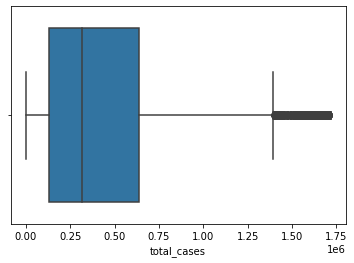

In [28]:
sns.boxplot(df2['total_cases'])

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases'>

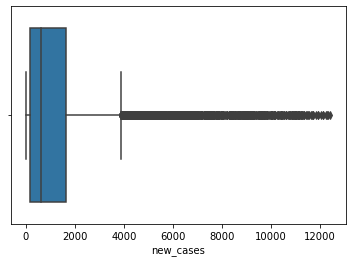

In [29]:
sns.boxplot(df2['new_cases'])

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_deaths'>

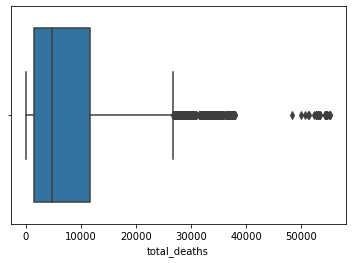

In [30]:
sns.boxplot(df2['total_deaths'])

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_deaths'>

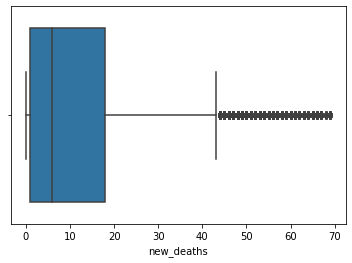

In [31]:
sns.boxplot(df2['new_deaths'])

In [27]:
q1=df2.total_cases.quantile(0.25)
q3=df2.total_cases.quantile(0.75)
iqr=q3-q1
df2=df2[~((df2['total_cases']<(q1-1.5*iqr)) | (df2['total_cases']>(q3+1.5*iqr)))]
df2.shape

(12352, 21)

In [20]:
q1=df2.new_cases.quantile(0.25)
q3=df2.new_cases.quantile(0.75)
iqr=q3-q1
df2=df2[~((df2['new_cases']<(q1-1.5*iqr)) | (df2['new_cases']>(q3+1.5*iqr)))]
df2.shape

(18371, 21)

In [21]:
q1=df2.total_deaths.quantile(0.25)
q3=df2.total_deaths.quantile(0.75)
iqr=q3-q1
df2=df2[~((df2['total_deaths']<(q1-1.5*iqr)) | (df2['total_deaths']>(q3+1.5*iqr)))]
df2.shape

(16544, 21)

In [22]:
q1=df2.new_deaths.quantile(0.25)
q3=df2.new_deaths.quantile(0.75)
iqr=q3-q1
df2=df2[~((df2['new_deaths']<(q1-1.5*iqr)) | (df2['new_deaths']>(q3+1.5*iqr)))]
df2.shape

(14910, 21)

In [23]:
q1=df2.total_cases_per_million.quantile(0.25)
q3=df2.total_cases_per_million.quantile(0.75)
iqr=q3-q1
df2=df2[~((df2['total_cases_per_million']<(q1-1.5*iqr)) | (df2['total_cases_per_million']>(q3+1.5*iqr)))]
df2.shape

(13440, 21)

In [24]:
q1=df2.total_deaths_per_million.quantile(0.25)
q3=df2.total_deaths_per_million.quantile(0.75)
iqr=q3-q1
df2=df2[~((df2['total_deaths_per_million']<(q1-1.5*iqr)) | (df2['total_deaths_per_million']>(q3+1.5*iqr)))]
df2.shape

(13401, 21)

In [26]:
df2.shape

(13401, 21)

In [32]:
df2.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_vaccinations,people_fully_vaccinated,population,hospital_beds_per_thousand,median_age,aged_65_older,aged_70_older,life_expectancy
total_cases,1.000000,0.331890,0.788116,0.235930,0.225884,-0.043344,0.292625,-0.163843,0.436576,0.306880,0.497784,0.483967,0.375551,-0.036468,-0.023905,-0.006285,-0.005120,0.126140
new_cases,0.331890,1.000000,0.165393,0.454074,0.136963,0.545948,0.020119,0.161268,0.142893,0.220294,0.161346,0.148565,0.139755,0.076156,0.076776,0.089776,0.097222,0.144975
total_deaths,0.788116,0.165393,1.000000,0.285663,0.011303,-0.158056,0.445776,-0.136193,0.145233,0.067729,0.377438,0.365459,0.323554,-0.119204,-0.130895,-0.065657,-0.060064,-0.032430
new_deaths,0.235930,0.454074,0.285663,1.000000,-0.104910,0.119008,0.071496,0.479621,-0.002593,0.093292,0.069760,0.058108,0.206058,0.021516,-0.020039,0.023160,0.035756,-0.037198
total_cases_per_million,0.225884,0.136963,0.011303,-0.104910,1.000000,0.494576,0.661812,0.263495,0.026895,-0.001329,-0.209608,-0.191073,-0.380334,0.115371,0.352313,0.320179,0.334623,0.244832
new_cases_per_million,-0.043344,0.545948,-0.158056,0.119008,0.494576,1.000000,0.198565,0.428614,-0.083715,-0.037079,-0.141981,-0.134348,-0.199780,0.081015,0.200167,0.200675,0.215472,0.104179
total_deaths_per_million,0.292625,0.020119,0.445776,0.071496,0.661812,0.198565,1.000000,0.281746,-0.134358,-0.137330,-0.177889,-0.157247,-0.323678,0.100761,0.283108,0.323968,0.346421,0.077457
new_deaths_per_million,-0.163843,0.161268,-0.136193,0.479621,0.263495,0.428614,0.281746,1.000000,-0.189196,-0.119503,-0.213011,-0.203005,-0.222435,0.084648,0.192515,0.188968,0.213433,-0.042036
total_tests,0.436576,0.142893,0.145233,-0.002593,0.026895,-0.083715,-0.134358,-0.189196,1.000000,0.818549,0.397020,0.382884,0.184070,0.088527,0.115449,-0.066813,-0.071833,0.226095
new_tests,0.306880,0.220294,0.067729,0.093292,-0.001329,-0.037079,-0.137330,-0.119503,0.818549,1.000000,0.276521,0.259820,0.147243,0.176741,0.160051,0.002367,0.000888,0.248464


E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='total_deaths'>

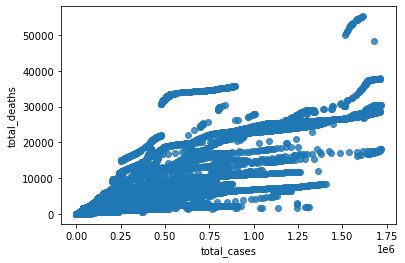

In [34]:
sns.regplot(df2['total_cases'],df2['total_deaths'],fit_reg=False)

<AxesSubplot:xlabel='aged_70_older', ylabel='aged_65_older'>

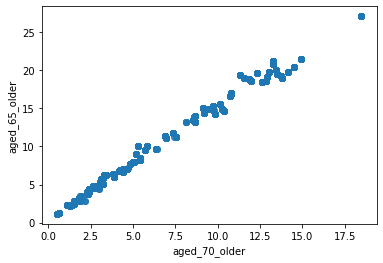

In [35]:
sns.regplot(df2['aged_70_older'],df2['aged_65_older'],fit_reg=False)

<AxesSubplot:xlabel='total_deaths', ylabel='aged_65_older'>

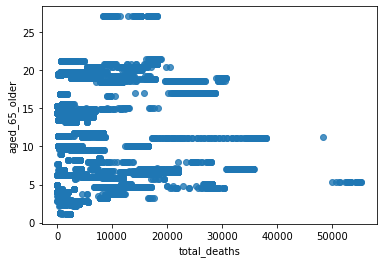

In [36]:
sns.regplot(df2['total_deaths'],df2['aged_65_older'],fit_reg=False)

<AxesSubplot:xlabel='total_cases', ylabel='aged_65_older'>

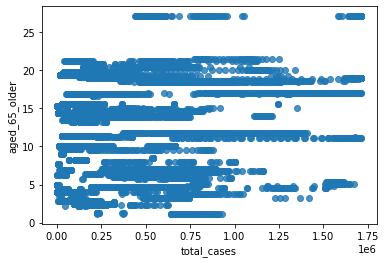

In [37]:
sns.regplot(df2['total_cases'],df2['aged_65_older'],fit_reg=False)

In [42]:
df2.to_csv('COVID_19.csv',index=False)

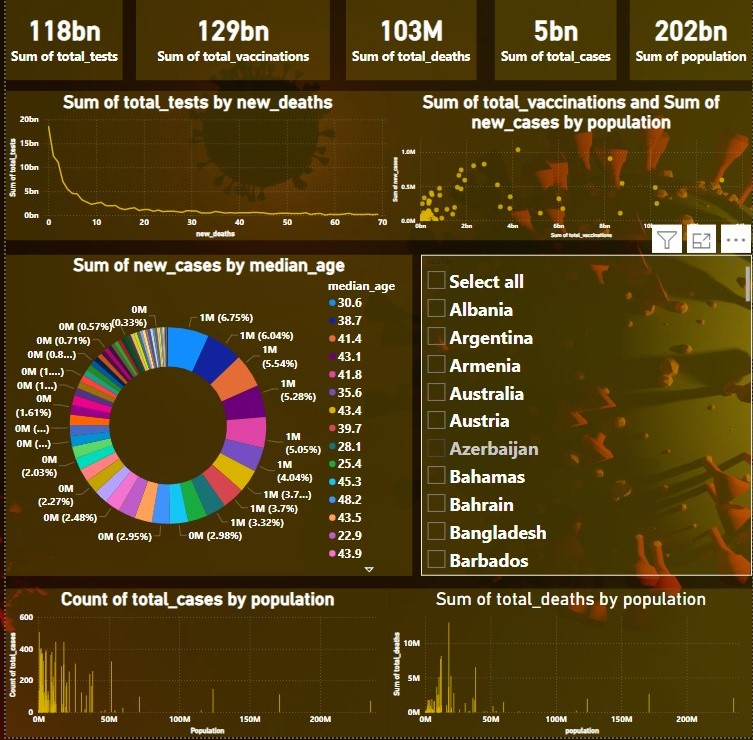